In [310]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [311]:
# Load it in
df = pd.read_csv("balanced_data.csv")
df.describe()

,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,4.362545e+17,165.811818,48656.770300,38.612162,-90.298106,7.783886e+04,1973.020900,1.380415e+09,38.609157,-90.299315,0.214500
std,1.340442e+18,292.872795,26861.090235,5.055117,13.763778,2.623066e+05,17.383362,5.070100e+06,5.084692,13.772928,0.410496
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924.000000,1.371817e+09,19.161782,-166.509533,0.000000
25%,3.879740e+13,12.912500,26041.000000,34.699875,-96.745600,7.820000e+02,1962.000000,1.375932e+09,34.784734,-96.884139,0.000000
50%,3.514900e+15,56.760000,48088.000000,39.412500,-87.591700,2.607000e+03,1975.000000,1.380299e+09,39.445492,-87.527878,0.000000
75%,4.629450e+15,127.555000,71762.000000,42.076500,-80.175200,1.823850e+04,1987.000000,1.385399e+09,42.049199,-80.157098,0.000000
max,4.992350e+18,8517.380000,99921.000000,64.755600,-67.950300,2.906700e+06,2005.000000,1.388533e+09,65.549618,-66.960745,1.000000


In [312]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,4.362545e+17,165.811818,48656.770300,38.612162,-90.298106,7.783886e+04,1973.020900,1.380415e+09,38.609157,-90.299315,0.214500
std,1.340442e+18,292.872795,26861.090235,5.055117,13.763778,2.623066e+05,17.383362,5.070100e+06,5.084692,13.772928,0.410496
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924.000000,1.371817e+09,19.161782,-166.509533,0.000000
25%,3.879740e+13,12.912500,26041.000000,34.699875,-96.745600,7.820000e+02,1962.000000,1.375932e+09,34.784734,-96.884139,0.000000
50%,3.514900e+15,56.760000,48088.000000,39.412500,-87.591700,2.607000e+03,1975.000000,1.380299e+09,39.445492,-87.527878,0.000000
75%,4.629450e+15,127.555000,71762.000000,42.076500,-80.175200,1.823850e+04,1987.000000,1.385399e+09,42.049199,-80.157098,0.000000
max,4.992350e+18,8517.380000,99921.000000,64.755600,-67.950300,2.906700e+06,2005.000000,1.388533e+09,65.549618,-66.960745,1.000000


In [313]:
# Dropping transaction number, customer number, customer name, first, last, street because no
df = df.drop("trans_num", axis = 1)
df = df.drop("cc_num", axis = 1)
df = df.drop("full_name", axis = 1)
df = df.drop("first", axis = 1)
df = df.drop("last", axis = 1)
df = df.drop("street", axis = 1)

# Dropping lat and long because merch lat and long are very similarly correlated
df = df.drop("lat", axis = 1)
df = df.drop("long", axis = 1)

# Dropping na
df.dropna()

,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Jenkins, Hauck and Friesen",gas_transport,75.79,M,Benton,WI,53803,1306,Public relations officer,1958,1387767028,43.522950,-91.270081,0
1,fraud_Schuppe LLC,entertainment,81.57,M,Nazareth,TX,79063,686,Petroleum engineer,1980,1372895074,34.214647,-101.425936,0
2,fraud_Lockman Ltd,grocery_pos,311.92,M,Etlan,VA,22719,395,Senior tax professional/tax inspector,1982,1384475389,39.006783,-79.036502,1
3,fraud_Johns Inc,entertainment,8.21,M,Rockwood,PA,15557,3684,General practice doctor,1976,1374241810,40.397423,-79.586829,0
4,fraud_Frami Group,entertainment,2.32,F,North Prairie,WI,53153,2328,Applications developer,1942,1387026602,43.016038,-88.425097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"fraud_Kihn, Brakus and Goyette",personal_care,73.04,M,Muskegon,MI,49440,128715,Historic buildings inspector/conservation officer,1995,1388089676,44.131680,-87.033165,0
9996,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,7.53,F,Hinckley,OH,44233,7646,Medical sales representative,1988,1388252002,41.637956,-82.002563,0
9997,"fraud_Lesch, D'Amore and Brown",food_dining,74.33,M,Mc Nabb,IL,61335,532,Audiological scientist,1956,1387060487,41.211065,-90.022469,0
9998,fraud_Cartwright-Harris,grocery_pos,284.36,M,Watertown,MN,55388,5619,Licensed conveyancer,1959,1377832799,45.917657,-94.364030,1


In [314]:
# Converting merchant, city, state, zip into factors with labelencoder
df['merchant'] = LabelEncoder().fit_transform(df['merchant'])
df['city'] = LabelEncoder().fit_transform(df['city'])
df['state'] = LabelEncoder().fit_transform(df['state'])
df['zip'] = LabelEncoder().fit_transform(df['zip'])

# Less categories with job, category, gender so use get_dummies instead
df = pd.get_dummies(df, columns = ["job", "category", "gender"], drop_first = True)

In [315]:
df.columns

Index(['merchant', 'amt', 'city', 'state', 'zip', 'city_pop', 'dob',
       'unix_time', 'merch_lat', 'merch_long',
       ...
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object', length=498)

In [316]:
# Train test split
X = df.drop("is_fraud", axis = 1)
y = df["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [328]:
# Make decision tree model
classification_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [330]:
# Confusion matrix and metrics
y_pred = classification_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1507   46]
 [  33  414]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1553
           1       0.90      0.93      0.91       447

    accuracy                           0.96      2000
   macro avg       0.94      0.95      0.94      2000
weighted avg       0.96      0.96      0.96      2000



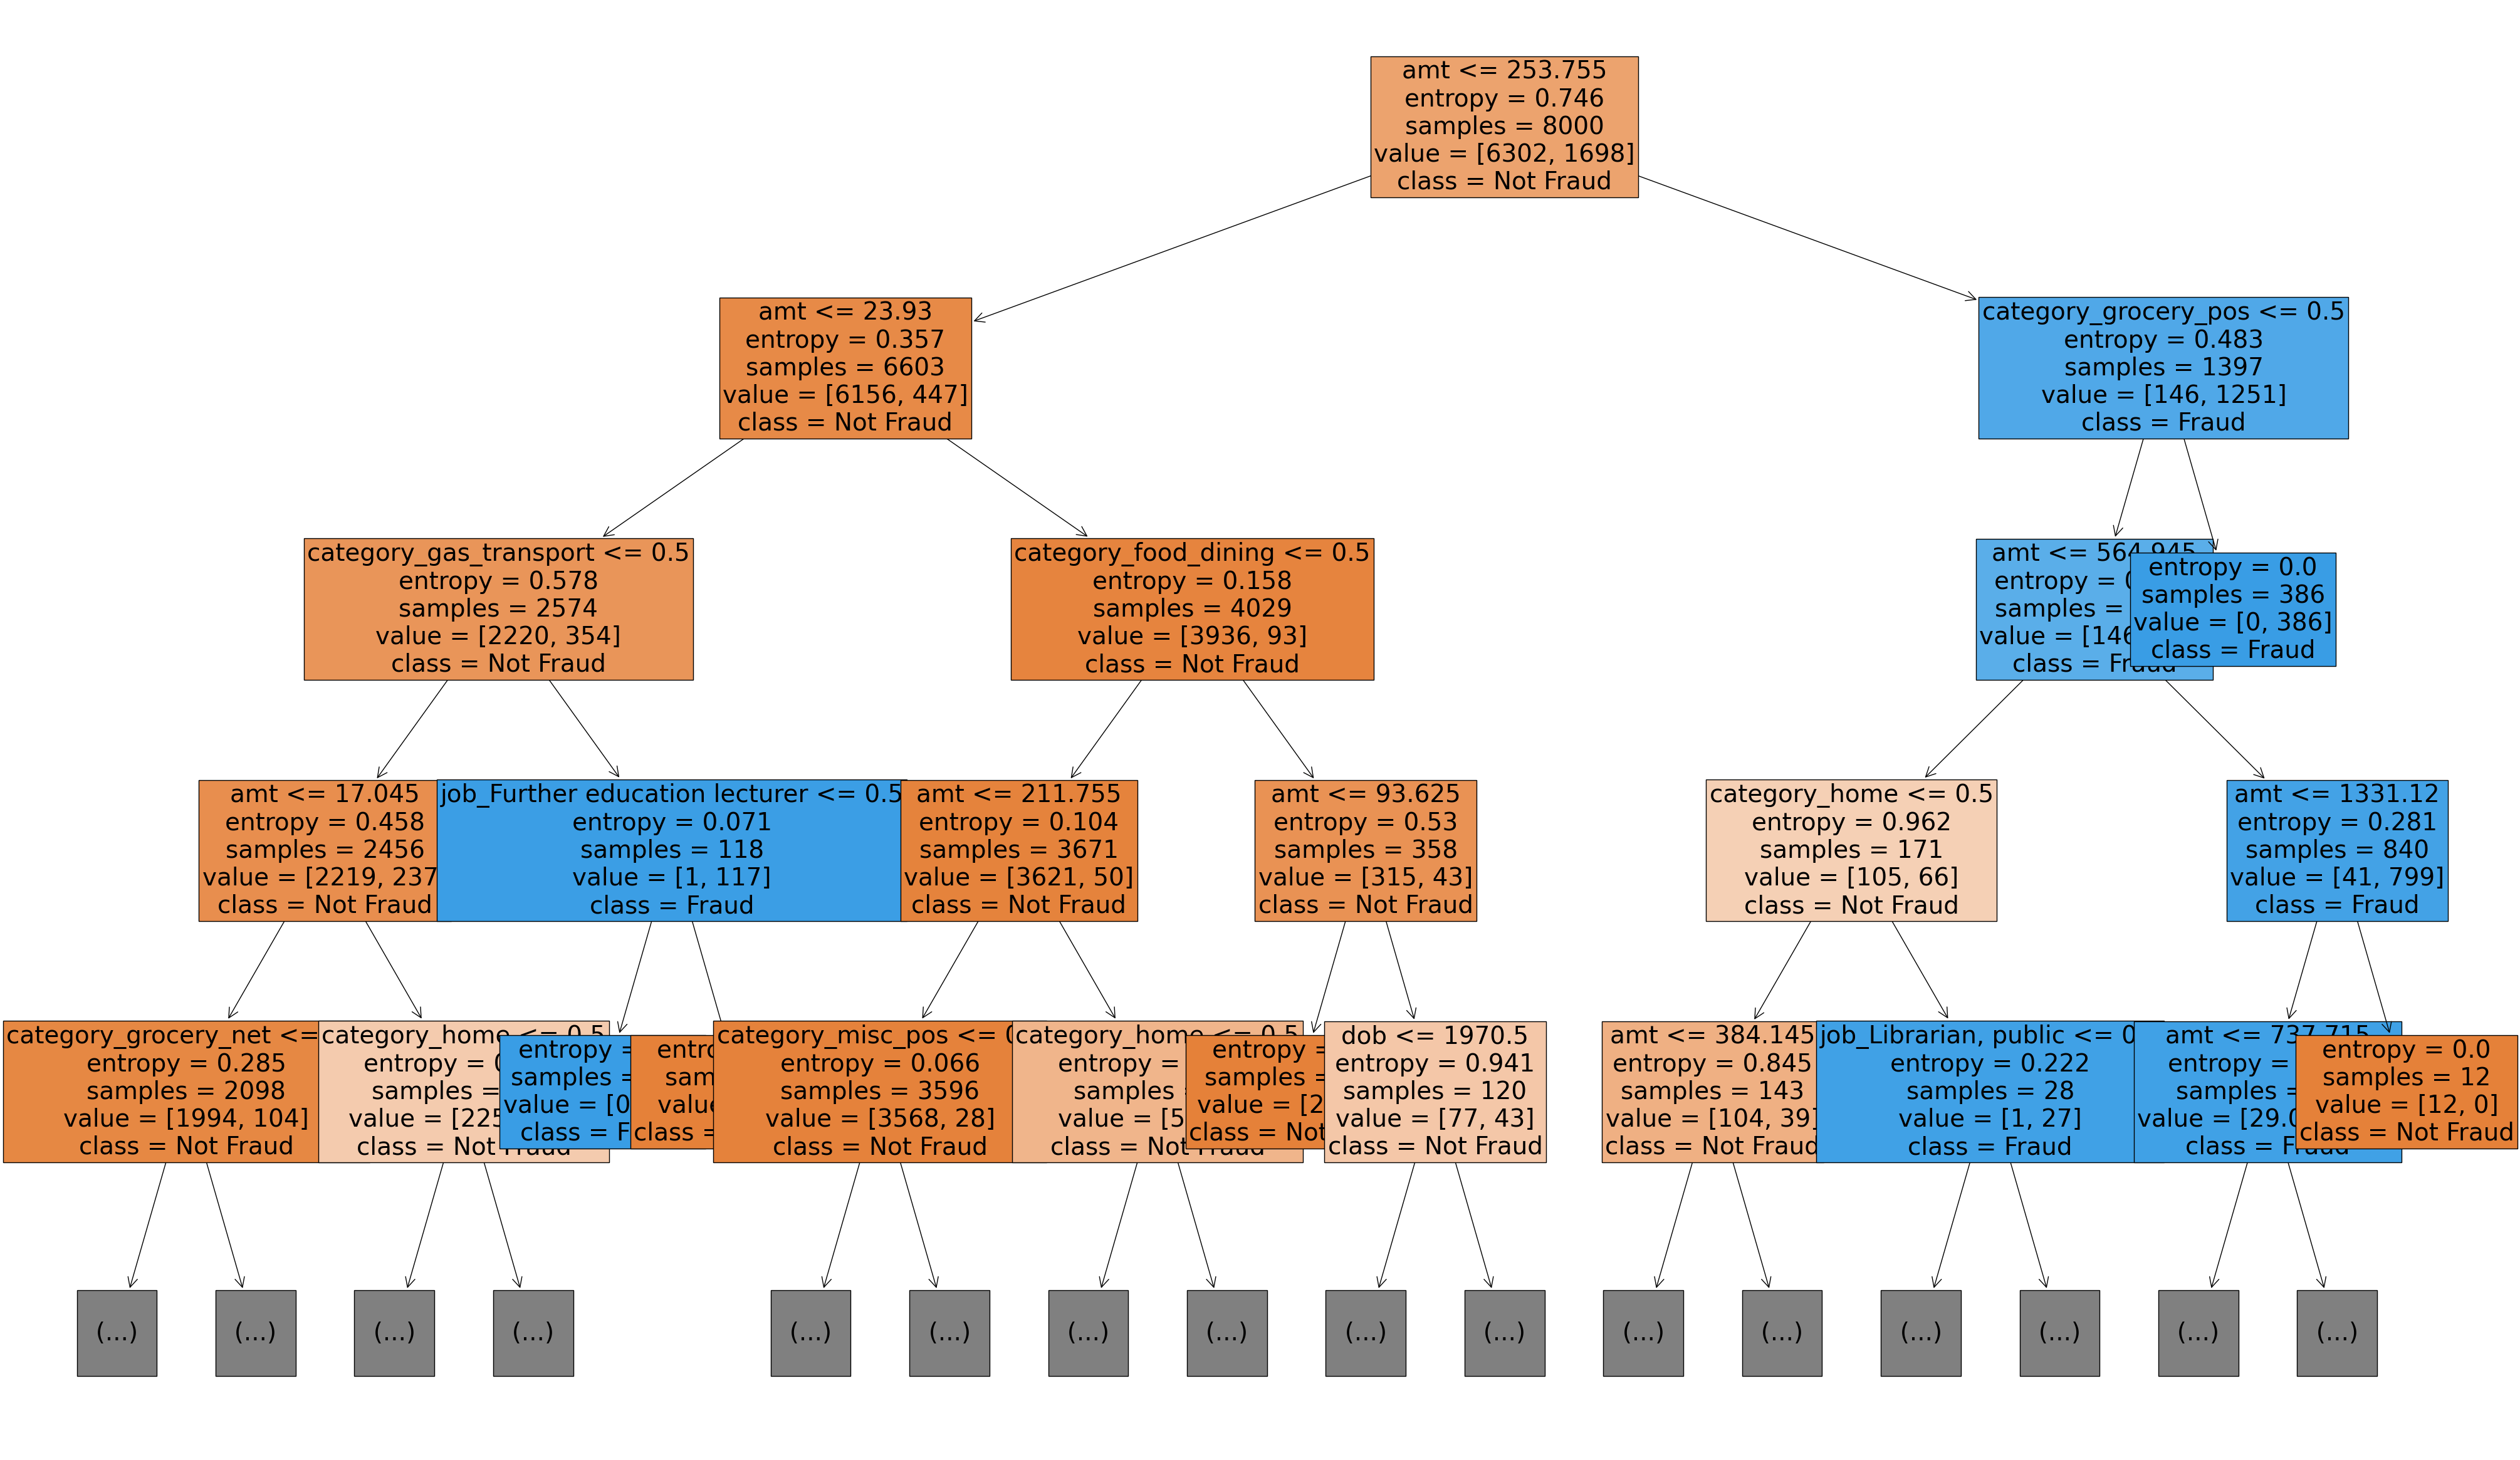

In [334]:
# Plot the tree :)
plt.figure(figsize = (50, 30))
tree.plot_tree(classification_tree, feature_names = X.columns, class_names = ["Not Fraud", "Fraud"], filled = True, fontsize = 28, max_depth = 4)
plt.show()

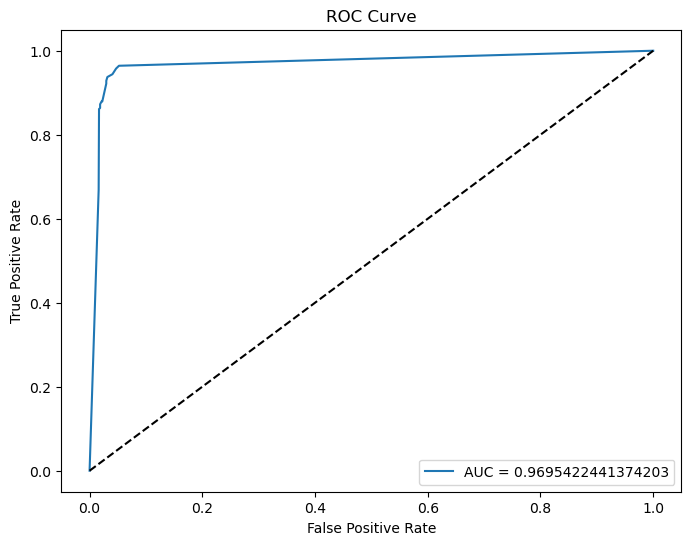

In [332]:
# ROC AUC
y_pred_prob = classification_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f"AUC = {roc_auc}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [336]:
# importance of features
importances = classification_tree.feature_importances_
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending = False)

print(feature_importance.head(20))

                             feature  importance
1                                amt    0.724784
484           category_gas_transport    0.063541
485             category_grocery_net    0.023191
488                    category_home    0.021189
6                                dob    0.020075
491                category_misc_pos    0.017496
5                           city_pop    0.017483
495                  category_travel    0.015762
483             category_food_dining    0.014266
486             category_grocery_pos    0.014198
7                          unix_time    0.010251
3                              state    0.005416
493            category_shopping_net    0.004626
2                               city    0.004541
9                         merch_long    0.004144
8                          merch_lat    0.003750
492           category_personal_care    0.003547
490                category_misc_net    0.003363
4                                zip    0.003064
240  job_Industrial/